In [5]:
import numpy as np
from numpy import ma
import pandas as pd
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import chi2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse




np.set_printoptions(precision=5, suppress=True)

# Set random seed to student number
np.random.seed(46387334) # TODO: UNCOMMENT

In [6]:
# Helper functions
def sig_fig(X, sigfigs):
    exp = np.floor(ma.log10(abs(X)).filled(0))
    return np.round(X*10**-exp, sigfigs-1) * 10**exp

def get_diff(a1, a2):
    print(f"{a1.shape=}")
    print(f"{a2.shape=}")

    rows, cols = a1.shape
    for i in range(rows):
        for j in range(cols):
            print(f"[{i},{j}]: {round(a1[i, j], 3) :>5} vs {round(a2[i, j], 3) :>7}  |  Error: {(a1[i, j] - a2[i, j]) * (100 / a1[i, j])  :.2f}%")

## 1.e)

[ 39.12747 506.64869]
[[ 150.83913  -38.34615]
 [ -38.34615 9725.27309]]
90.22946793427953
48.27817274001606 6.009416517692009


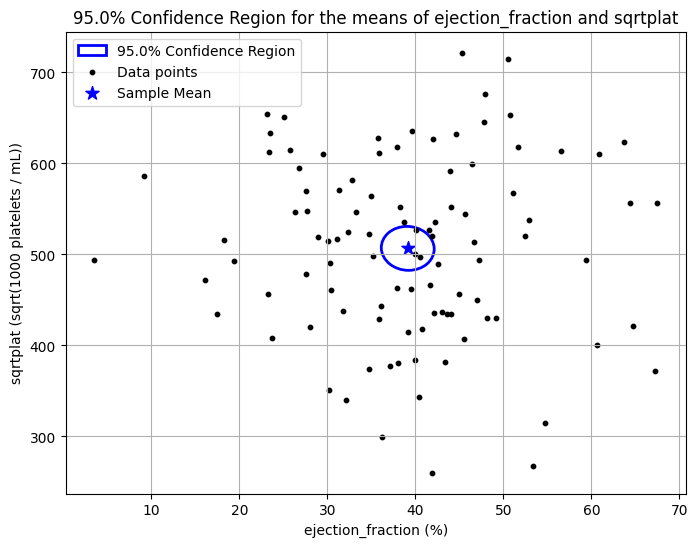

In [27]:
# Load the CSV file
df = pd.read_csv('question_1_a_obs.csv')

# Extract the variables
data = df[['ejection_fraction', 'sqrtplat']].values

# Number of observations
n = data.shape[0]

# Sample means
mean_vec = np.mean(data, axis=0)
print(mean_vec)
# Sample covariance matrix
cov_matrix = np.cov(data, rowvar=False)
print(cov_matrix)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues and eigenvectors
order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# Calculate the angle of the ellipse
theta = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
print(theta)

# Confidence level (95%)
confidence_level = 0.95

# Chi-squared critical value for 95% confidence level in 2 dimensions
chi2_val = chi2.ppf(confidence_level, df=2)

# Width and height of the ellipse
width, height = 2 * np.sqrt(eigenvalues * chi2_val / n)
print(width, height)

# Plotting the confidence ellipse
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the confidence ellipse
ellipse = Ellipse(xy=mean_vec, width=width, height=height, angle=theta, edgecolor='blue', fc='None', lw=2, label=f'{confidence_level * 100}% Confidence Region')
ax.add_patch(ellipse)

# Plot the observed data
ax.scatter(data[:, 0], data[:, 1], color='black', s=10, label='Data points')

# Plot the sample mean
ax.scatter(mean_vec[0], mean_vec[1], color='blue', s=100, marker='*', label='Sample Mean')

# Labels and title
ax.set_xlabel('ejection_fraction (%)')
ax.set_ylabel('sqrtplat (sqrt(1000 platelets / mL))')
ax.set_title(f'{confidence_level * 100}% Confidence Region for the means of ejection_fraction and sqrtplat')
ax.legend()
plt.grid(True)
plt.show()
